# Assignment: More Xarray with El Niño-Southern Oscillation (ENSO) Data

Here will will calculate the NINO 3.4 index of El Nino variabillity and use it to analyze datasets.

First read [this page from NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst). It tells you the following:

- The Niño 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
- Warm or cold phases of the Oceanic Niño Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

(Note that "anomaly" means that the seasonal cycle, also called the "climatology" has been removed.)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
"""
#############################################################################

********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********

############################################################################# 
"""



import numpy as np
from matplotlib import pyplot as plt
from statistics import mean
from numpy import mean
import xarray as xr



%matplotlib inline
%xmode Minimal
 
plt.rcParams["figure.figsize"] = (12, 6)


Exception reporting mode: Minimal


### 1. Reproduce the SST curve from the figure below

Use the `sst.mnmean.nc` file that we worked with in class, located at <http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc>.

You don't have to match the stylistic details, or use different colors above and below zero, just the "3mth running mean" curve.

![enso](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

Load the data as an Xarray dataset. Drop the `time_bnds` variable as we did in class and trim the data to 1950 onward for this assignment.

In [2]:

url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1950', None)).load()

ds;


In [3]:
#ds.time
#ds.lon
#ds.lat

Now calculate the climatology and the SST anomaly.

In [31]:

"""
********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""


climatology = ds.sst.groupby("time.month").mean(dim = "time")

sstAnomoly = ds.sst.groupby("time.month") - climatology



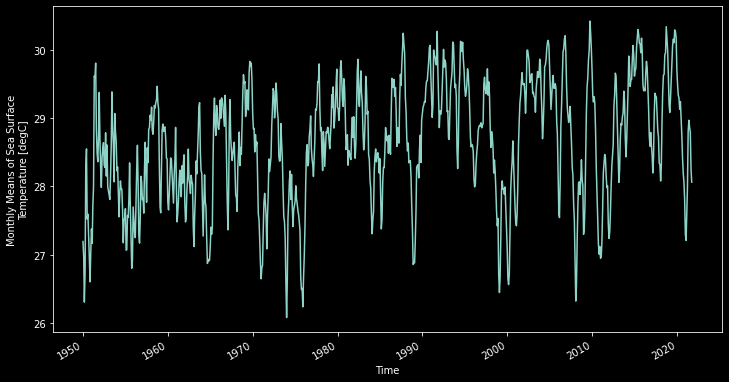

In [4]:

"""
Original Code Block: Notes examples code
"""

plt.style.use('dark_background')

ds.sst.sel(lon = 178, lat = 0).plot();

plt.title(label = "");


In [26]:

"""
 Original Code Block: Testing Note code
"""

# gb = ds.sst.groupby('time.month')
# gb

# for group_name, group_da in gb:
#     # stop iterating after the first loop
#     break 
# print(group_name)
# group_da


# #########################################

# sst_mm = gb.mean(dim='time')
# sst_mm;

# #########################################


'\n Original Code Block: Testing Note code\n\n'

In [27]:

"""
 Original Code Block: Testing Note code
"""

#gb.map(np.mean).plot()

'\n Original Code Block: Testing Note code\n\n'

In [28]:
"""
 Original Code Block: Testing Note code
"""

# sst_mm = gb.mean(dim='time')
# sst_mm.plot()

'\n Original Code Block: Testing Note code\n\n'

In [8]:
"""
 Original Code Block: Testing Note code
"""

#sst_mm.mean(dim='lon').transpose().plot.contourf(levels = 12, vmin = -2, vmax = 30)

'\n Original Code Block: Testing Note code\n\n'

In [9]:
"""
 Original Code Block: Testing Note code
"""
#sst_mm.mean(dim='lon').transpose().plot();

'\n Original Code Block: Testing Note code\n\n'

In [10]:
"""
 Original Code Block

"""

#((sst_mm.sel(month=1) + sst_mm.sel(month=2)+ sst_mm.sel(month=3)+ sst_mm.sel(month=4)+ sst_mm.sel(month=5)+ sst_mm.sel(month=6)+ sst_mm.sel(month=7)+ sst_mm.sel(month=8)+ sst_mm.sel(month=9)+ sst_mm.sel(month=10)+ sst_mm.sel(month=11) + sst_mm.sel(month=12))/12).plot(vmax=10)

'\n Original Code Block\n\n'

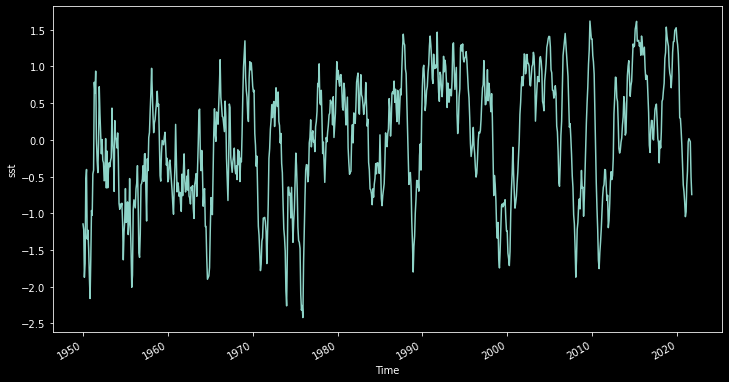

In [29]:

"""
 Original Code Block: Testing Note code
"""


gb = ds.groupby("time.month")

ds_anom = gb - gb.mean(dim = "time")

ds_anom

#########################################

ds_anom.sst.sel(lon = 178, lat = 0).plot()

plt.title(label = "");


Now reproduce the plot. Keep the rolling 3-month average of the SST anomaly as a DataArray for the next question.

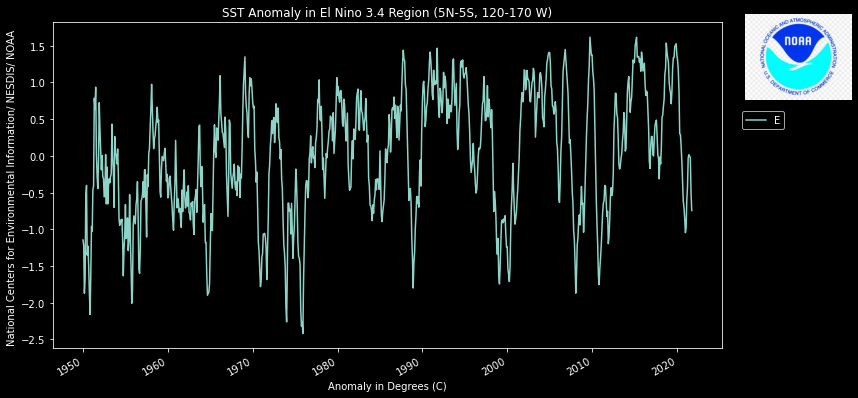

In [32]:
"""
Original code block
"""

fig, ax = plt.subplots()

ds_anom.sst.sel(lon = 178, lat = 0).plot()

plt.title(label = "SST Anomaly in El Nino 3.4 Region (5N-5S, 120-170 W)")
plt.xlabel("Anomaly in Degrees (C)")
plt.ylabel("National Centers for Environmental Information/ NESDIS/ NOAA ")
plt.legend("El Nino Threshold", loc = "right", bbox_to_anchor=(1.1, 0.7))
#plt.legend([line1, line2, line3], ['El Nino Threshold', 'label2', 'label3'])
#plt.legend(bbox_to_anchor=(.95, .3, .3, .3), loc = 3, ncol = 0, mode="expand", borderaxespad = 9)

fname = 'noaa.jpg'
img = plt.imread(fname)
#plt.imshow(img, )

newax = fig.add_axes([.85, 0.7, 0.2, 0.2], anchor = 'NE', zorder = -1)
newax.imshow(img)
newax.axis('off')

plt.show()

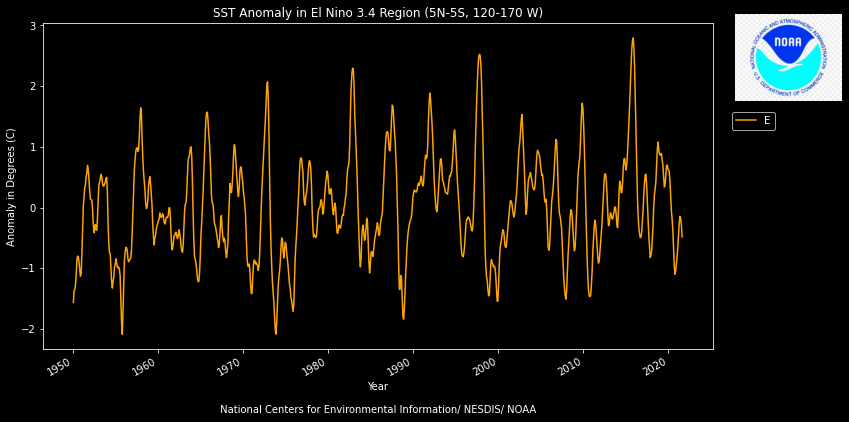

In [56]:

"""
 Original Code Block + 
 ********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""


fig, ax = plt.subplots()

#ds_anom.sst.sel(lon = 178, lat = 0).plot()

anomolyNino = sstAnomoly.sel(lat = slice(5, -5), lon = slice(360 - 170, 360 - 120))

meanAnomolyNino = anomolyNino.mean(dim = ("lon", "lat"))

oni = meanAnomolyNino.rolling(time = 3, center = True).mean("time")

oni.plot(color = "orange")

plt.title(label = "SST Anomaly in El Nino 3.4 Region (5N-5S, 120-170 W)")
plt.ylabel("Anomaly in Degrees (C)")
plt.xlabel("Year\n\n National Centers for Environmental Information/ NESDIS/ NOAA ")
#plt.xlabel("Year")
plt.legend("El Nino Threshold", loc = "right", bbox_to_anchor=(1.1, 0.7))
#plt.legend([line1, line2, line3], ['El Nino Threshold', 'label2', 'label3'])
#plt.legend(bbox_to_anchor=(.95, .3, .3, .3), loc = 3, ncol = 0, mode="expand", borderaxespad = 9)

fname = 'noaa.jpg'
img = plt.imread(fname)
#plt.imshow(img, )

newax = fig.add_axes([.85, 0.7, 0.2, 0.2], anchor = 'NE', zorder = -1)
newax.imshow(img)
newax.axis('off')

plt.show()


### 2. Calculate boolean timeseries representing the positive / negative ENSO phases

Refer to the definitions of warm/cold phases above.

In [45]:

# boolCloudArea = ds.cldarea_total_daynight_mon

# lowCloud =  boolCloudArea <= 25
# highCloud = boolCloudArea >= 75 

# # ds.where(lowCloud).mean("time")

# whereLow = ds.where(lowCloud).mean("time")

# cloudARl = whereLow.cldarea_total_daynight_mon.plot()
# plt.title(label = "Cloud Area Low");

# whereLow


"""
********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""


oniPos = ((oni > 0.5).rolling(time = 5, center = True).sum() == 5).rolling(time = 5, center = True).max()

oniNeg = ((oni < -0.5).rolling(time = 5, center = True).sum() == 5).rolling(time = 5, center = True).max()

oniBinary = oniPos - oniNeg

oniBinary;



Plot them somehow.

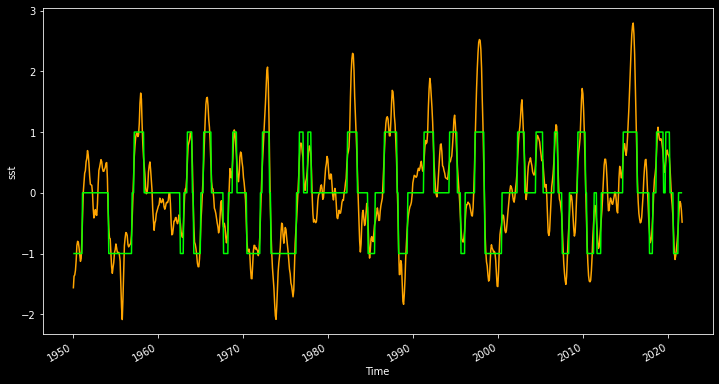

In [55]:
"""
********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""

oni.plot(color = "orange")

oniBinary.plot(color = "lime")


### 3. Plot composites of SST anomaly for the positive and negative ENSO regimes

These should be pcolormesh maps. First positive ONI.

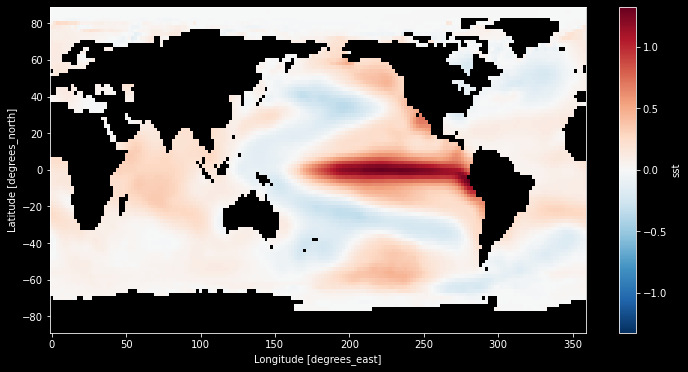

In [62]:
"""
********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********

* Used  where  for familiarity
"""

sstAnomoly.where(oniPos).mean(dim = "time").plot();


And negative ONI.

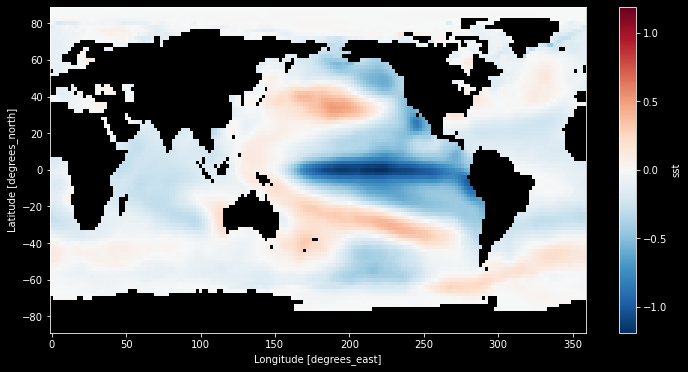

In [63]:
"""
********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""

sstAnomoly.where(oniNeg).mean(dim = "time").plot();


### 4. Calculate the composite of preciptiation for positive and negative ENSO phases.

First load the precip dataset. Code to fix the broken time coordinate is included.

In [69]:

import pandas as pd
import xarray as xr

url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'

dsp = xr.open_dataset(url, decode_times=False)

true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS'))

dsp['T'] = true_time

dsp = dsp.rename({'T': 'time'})

dsp.load();


In [15]:
#dsp

In [68]:
dsp.prcp.load();

In [17]:
dsp.prcp;

Now plot the *difference* between the time-mean of `prcp` during positive and negative ENSO phases.

In [18]:

timeMean = dsp.prcp.mean("time")

timeMean;


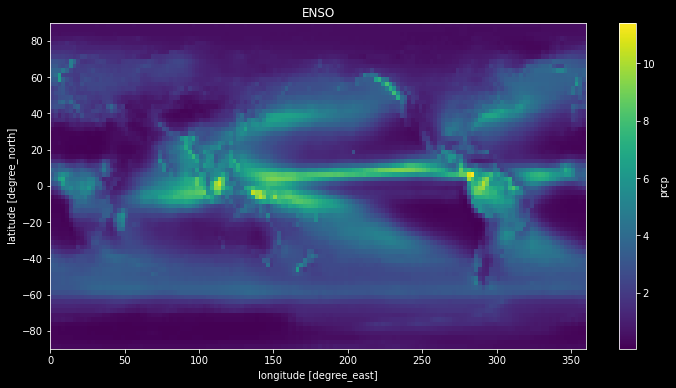

In [80]:

"""
Original code block
"""

boolPrcp = dsp.prcp

posPrcp =  boolPrcp > 0
negPrcp = boolPrcp < 0 

########################################################
# ds.where(lowCloud).mean("time")

wherePos = dsp.where(posPrcp).mean("time")

pos = wherePos.prcp.plot()
plt.title(label = "ENSO");


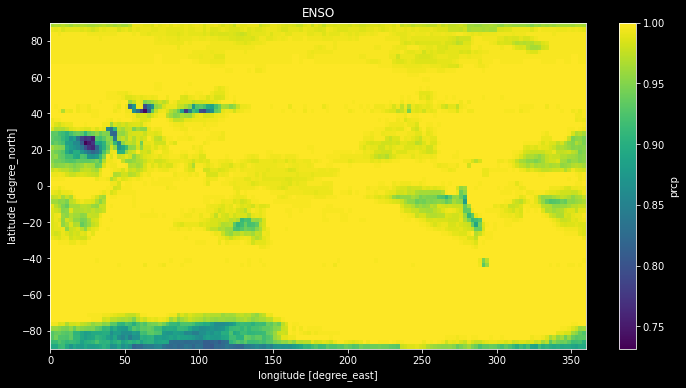

In [98]:

"""
 Original Code Block + 
 ********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""


boolPrcp = dsp.prcp

posPrcp =  boolPrcp > 0
negPrcp = boolPrcp < 0 

########################################################
# ds.where(lowCloud).mean("time")

wherePos = posPrcp.mean(dim = "time")

whereNeg = negPrcp.mean(dim = "time")

ensoMean = wherePos - whereNeg

pos = ensoMean.plot()
plt.title(label = "ENSO");



In [75]:
"""
Original code block
"""

# testing = timeMean.where(posPrcp).mean("time")
# testing2 = timeMean.where(negPrcp).mean("time")

# testing3 = testing - testing2

# testing3.plot()

'\nOriginal code block\n'

In [77]:
"""
Original code block
"""

# whereNeg = dsp.where(negPrcp).mean("time")

# neg = whereNeg.prcp.plot()
# plt.title(label = "ENSO Neg");


'\nOriginal code block\n'

In [73]:
"""
Original code block
"""

# plt.style.use('dark_background')

# timeMean.plot()

# plt.title(label = "Time Mean: Precipitation");

# ########################################################


'\nOriginal code block\n'

In [71]:
"""
Original code block
"""

# diffPrcp = wherePos - whereNeg

# diffPrcp.plot()

'\nOriginal code block\n'